In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load dataset dari tensorflow_datasets
dataset_name = "cifar10"
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)
x_train, y_train = [], []
x_test, y_test = [], []

for image, label in dataset['train']:
    x_train.append(image.numpy())
    y_train.append(label.numpy())

for image, label in dataset['test']:
    x_test.append(image.numpy())
    y_test.append(label.numpy())

x_train = np.array(x_train).astype('float32') / 255.0
x_test = np.array(x_test).astype('float32') / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
# Reshape agar cocok dengan CNN
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

In [7]:
# Membangun model CNN
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [9]:
# Training model
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 64s 158ms/step - accuracy: 0.3262 - loss: 1.8442 - val_accuracy: 0.5327 - val_loss: 1.3487
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 147ms/step - accuracy: 0.5231 - loss: 1.3259 - val_accuracy: 0.5920 - val_loss: 1.1604
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 149ms/step - accuracy: 0.5896 - loss: 1.1623 - val_accuracy: 0.6386 - val_loss: 1.0376
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 154ms/step - accuracy: 0.6310 - loss: 1.0514 - val_accuracy: 0.6553 - val_loss: 0.9966
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 151ms/step - accuracy: 0.6612 - loss: 0.9615 - val_accuracy: 0.6666 - val_loss: 0.9548
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 90s 171ms/step - accuracy: 0.6825 - loss: 0.9066 - val_accuracy: 0.6774 - val_loss: 0.9312
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 168ms/step - accuracy: 0.6980 - loss: 0.8555 - val_accuracy: 0.6834 - val_loss: 0.9176
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 172ms/step - accuracy: 0.7066 - loss: 0

In [10]:
# Evaluasi model
predictions = np.argmax(model_cnn.predict(x_test), axis=1)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


In [11]:
# Print hasil evaluasi
print(f'CNN Test Accuracy: {accuracy:.4f}')
print(f'CNN Precision: {precision:.4f}')
print(f'CNN Recall: {recall:.4f}')
print(f'CNN F1 Score: {f1:.4f}')

CNN Test Accuracy: 0.7084
CNN Precision: 0.7101
CNN Recall: 0.7084
CNN F1 Score: 0.7068


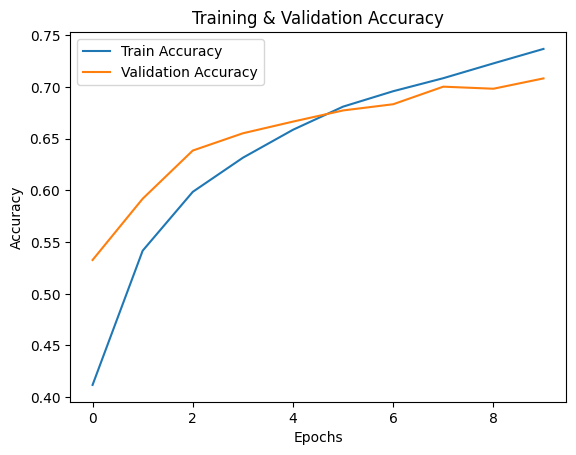

In [12]:
# Plot Akurasi
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()